<a href="https://colab.research.google.com/github/PawandeepKaur2405/fuel_estimation_project/blob/main/Vehicle_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries
import numpy as np                # It is used for mathematical operations
import pandas as pd               # It is used for dataframe related task
import matplotlib.pyplot as plt   # It is used for visualization purpose
import seaborn as sns             # It is used for visualization purpose

In [ ]:
# defining the column names
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']

# reading the .data file using pandas
df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?", comment = '\t', sep= " ", skipinitialspace=True)

In [ ]:
df.shape

(398, 8)

In [ ]:
df.head(6)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [ ]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# checking for all the null values
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
df[df.Horsepower.isna()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [ ]:
df[df.Cylinders==4].mean()

MPG               29.286765
Cylinders          4.000000
Displacement     109.796569
Horsepower        78.281407
Weight          2308.127451
Acceleration      16.601471
Model Year        77.073529
Origin             1.985294
dtype: float64

In [ ]:
df.Horsepower.mean()

104.46938775510205

In [ ]:
df.Horsepower.median()

93.5

In [ ]:
df.Horsepower.mode()

0    150.0
dtype: float64

In [ ]:
# filling the null values
df.Horsepower = df.Horsepower.fillna(df.Horsepower.median())

In [ ]:
# now we don't have any Null Values
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

## EDA

<AxesSubplot:xlabel='Horsepower'>

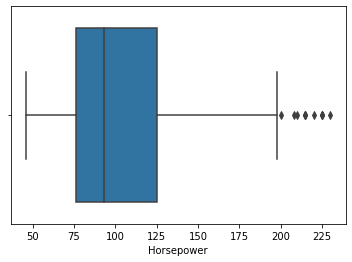

In [ ]:
# looking at horsepower box plot
sns.boxplot(x=df['Horsepower'])

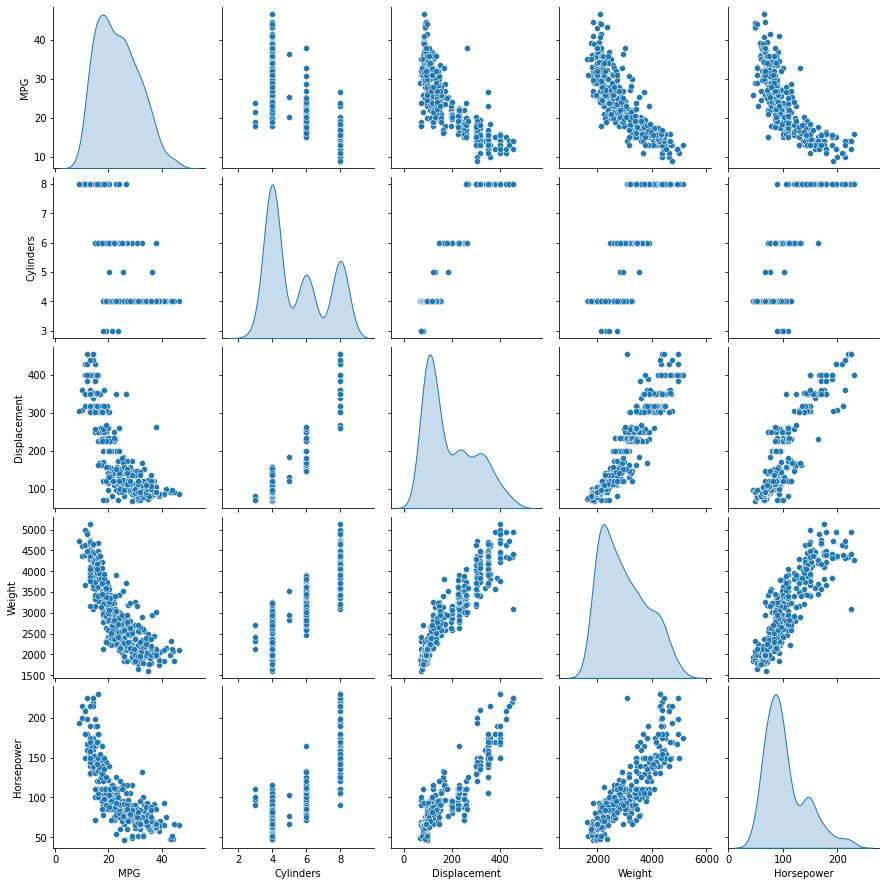

In [ ]:
# pairplots to get an intuition of potential correlations
sns.pairplot(df[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")

In [ ]:
# Feature Engineering

df['displacement_on_power'] = df['Displacement'] / df['Horsepower']
df['acceleration_on_power'] = df['Acceleration'] / df['Horsepower']
df['acceleration_on_cyl'] = df['Acceleration'] / df['Cylinders']

In [ ]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,displacement_on_power,acceleration_on_power,acceleration_on_cyl
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,2.361538,0.092308,1.5000
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,2.121212,0.069697,1.4375
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,2.120000,0.073333,1.3750
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,2.026667,0.080000,1.5000
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,2.157143,0.075000,1.3125


In [ ]:
df.Origin.value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,displacement_on_power,acceleration_on_power,acceleration_on_cyl
MPG,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450,-0.577236,0.704240,0.732133
Cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543,0.732550,-0.695407,-0.913462
Displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409,0.751036,-0.730931,-0.884569
Horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096,0.398118,-0.850591,-0.846458
Weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024,0.685536,-0.706756,-0.801469
Acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873,-0.084175,0.843825,0.770886
Model Year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662,-0.161021,0.320542,0.342416
Origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000,-0.634475,0.406884,0.508619
displacement_on_power,-0.577236,0.732550,0.751036,0.398118,0.685536,-0.084175,-0.161021,-0.634475,1.000000,-0.278609,-0.594729
acceleration_on_power,0.704240,-0.695407,-0.730931,-0.850591,-0.706756,0.843825,0.320542,0.406884,-0.278609,1.000000,0.867597


<AxesSubplot:>

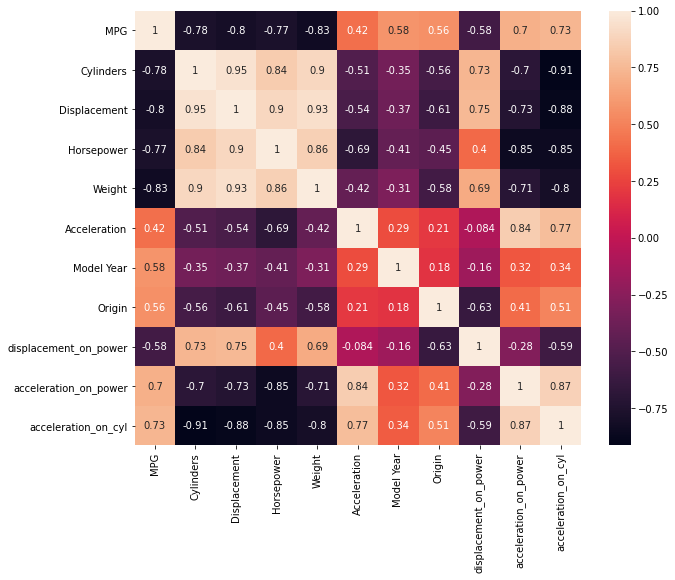

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
# defining the column names
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']

# reading the .data file using pandas
df1 = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?", comment = '\t', sep= " ", skipinitialspace=True)

In [ ]:
X = df1.drop("MPG",axis=1)
y = df1["MPG"]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# replacing all the complicated stuff with this function
def transform_data(temp_df):
    temp_df = pd.DataFrame(temp_df)
    
    # filling null values
    median = temp_df['Horsepower'].median()
    temp_df['Horsepower'] = temp_df['Horsepower'].fillna(median)

    # creating new features
    temp_df['displacement_on_power'] = temp_df['Displacement'] / temp_df['Horsepower']
    temp_df['acceleration_on_power'] = temp_df['Acceleration'] / temp_df['Horsepower']
    temp_df['acceleration_on_cyl'] = temp_df['Acceleration'] / temp_df['Cylinders']

    # using standard scalar
    scalar = StandardScaler()
    temp_df = scalar.fit_transform(temp_df)

    return temp_df

In [ ]:
X = transform_data(X)

In [ ]:
X

array([[ 1.49819126,  1.0906037 ,  0.67311762, ...,  1.14754788,
        -1.02693601, -1.42777381],
       [ 1.49819126,  1.5035143 ,  1.58995818, ...,  0.67274874,
        -1.31106325, -1.48054589],
       [ 1.49819126,  1.19623199,  1.19702651, ...,  0.67035402,
        -1.26536856, -1.53331797],
       ...,
       [-0.85632057, -0.56103873, -0.53187283, ..., -0.34286877,
        -0.45156789, -0.24567922],
       [-0.85632057, -0.70507731, -0.66285006, ..., -0.51703263,
         0.77170842,  1.23193901],
       [-0.85632057, -0.71467988, -0.58426372, ..., -0.65091769,
         0.78606296,  1.40080967]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

(278, 10)

In [ ]:
X_test.shape

(120, 10)

In [ ]:
# Using Random Forest Algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
 
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
 
forest_reg = RandomForestRegressor()

# Optimizing the hyperparameters using Grid Search CV
grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10)
 
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 10}

In [ ]:
cv_scores = grid_search.cv_results_

#printing all the parameters along with their scores

for mean_score,params in zip(cv_scores['mean_test_score'] , cv_scores["params"]):
    print(np.sqrt(-mean_score),params)

4.100103291596892 {'max_features': 2, 'n_estimators': 3}
3.3506905057136156 {'max_features': 2, 'n_estimators': 10}
3.1719684027292883 {'max_features': 2, 'n_estimators': 30}
3.4357499286206004 {'max_features': 4, 'n_estimators': 3}
3.1218265135050793 {'max_features': 4, 'n_estimators': 10}
3.1511074791398537 {'max_features': 4, 'n_estimators': 30}
3.56652897012877 {'max_features': 6, 'n_estimators': 3}
3.151746282559818 {'max_features': 6, 'n_estimators': 10}
3.025226334082788 {'max_features': 6, 'n_estimators': 30}
3.3642974533321746 {'max_features': 8, 'n_estimators': 3}
2.996162492679541 {'max_features': 8, 'n_estimators': 10}
2.999009062776 {'max_features': 8, 'n_estimators': 30}
3.3680778295232496 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.218697331720942 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.942629528805735 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.2825362822738833 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# making final predictions and evaluating the performance
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
# Final Mean Square Error on Test Data
final_mse

8.164710833333334

In [ ]:
# Final Root Mean Square Error on Test Data
final_rmse

2.857395813207077

In [ ]:
# checking it on a random sample
vehicle_config = {
    'Cylinders': [4, 6, 8],
    'Displacement': [155.0, 160.0, 165.5],
    'Horsepower': [93.0, 130.0, 98.0],
    'Weight': [2500.0, 3150.0, 2600.0],
    'Acceleration': [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin': [3, 2, 1]
}

In [ ]:
final_model.predict(transform_data(vehicle_config))

array([31.86333333, 15.64      , 20.76      ])

In [ ]:
import pickle

# Save the model for future use
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out) # write final_model in .bin file
    f_out.close()  # close the file 

In [ ]:
# loading the model from the saved file
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

In [ ]:
model.predict(transform_data(vehicle_config))

array([31.86333333, 15.64      , 20.76      ])